# Produccion eléctrica en base a la metereología

La idea principal del trabajo es ser capaces de predecir como va a afectar a la produccion eléctrica de energias renovables y no renovables las precipitaciones, el viento y las horas de sol.
Como las horas de sol y el viento son fenomenos cuya causa efecto en principio es prácticamente inmediato, también vamos a centrarnos en la produccion de energia hidroelectrica para poder medir cuanto tiempo tarda en afectar a este tipo de energía las precipitaciones..

En base a esto tenemos varias cuestiones que queremos despejar:
- Que relación hay entre precipitaciones y el aumento de la generación de energia eléctrica hidráulica.
- Que relación hay entre horas de sol, temperatura y el aumento de la generación de energia eléctrica sólar.
- Que relación hay entre viento y el aumento de la generación de energia eléctrica eólica, esta relación esta condicionada por la temperatura, percipitaciones o horas de sol.
- Cuantos días tarda en aumentar la generación eléctrica de fuentes de energía renovables en función de los fenomenos metereológicos.
- Dados una prediccion meteorologica que valores de generación eléctrica tendremos para una fecha determinada.



Como premisas partimos de :
- Vamos a considerar solo el poll de energia que proporciona Red Electrica de España (REE)
- Vamos a considerar que las empresas no trabajan bajo mala praxis y que intentan optimizar el uso de energias renovables.
- Debido a la falta de datos a nivel diario de REE por provincia o comunidades autonomas, voy a centrar el analisis a nivel de sistema eléctrico (Peninsula, Baleares, Canarias ,Ceuta y Melilla).

Como origenes de datos para el estudio vamos a utilizar los datos proporcionados por:
- Información de REE (https://www.ree.es/es/apidatos) obtenida mediante su API.
- Datos proporcionados por aemet(https://opendata.aemet.es/centrodedescargas/inicio), vamos a utilizar la libreria  aemet desarrollada por Pablo Moreno (https://pypi.org/project/python-aemet/).

Requisitos para la ejecución del notebook:

Como requisitos para la ejecución del proyecto es necesario la instalación de la libreria python Aemet(pip install python-aemet) e instalar la libreria request.

Además las versiones de cada libreria utilizada en este proyecto son:

El modelo ha utilizar al tratarse de una prediccion númerica y no de obtener una etiqueta, sera una regresión.
Para poder llevar a cabo esa regresion se han pasado los valores de fechas a númericos, y se ha creado una columna por cada tipo de energia, creando varias variables objetivo.



In [ ]:
# If the code is executed from Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/TFM_Generacion_electrica_AEMET/Python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/TFM_Generacion_electrica_AEMET/Python'
/content/drive/My Drive/TFM_Generacion_electrica_AEMET/Python


In [ ]:
from Lectura_AEMET_REE import Ingestion_AEMET,Ingestion_REE
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

Ing_AEMET=Ingestion_AEMET()

Ing_REE=Ingestion_REE()

pd.options.display.max_columns=None
plt.style.use('ggplot')




In [ ]:
# put this in an input sentence
date_ini="2016-01-01T00:00:00UTC"
date_end="2021-12-31T00:00:00UTC"

In [ ]:
df_Matrix_Corr=df_weather_system.corr()

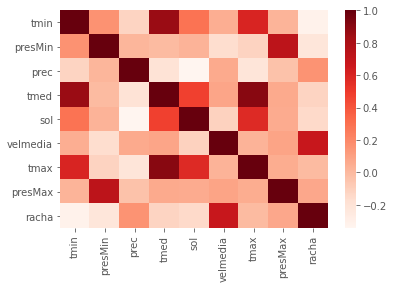

In [ ]:
sns.heatmap(df_Matrix_Corr,cmap='Reds');

In [ ]:
df_Matrix_Corr

,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha
tmin,1.000000,0.165303,-0.120148,0.862452,0.291385,0.050246,0.601906,0.022814,-0.312461
presMin,0.165303,1.000000,0.018770,-0.003713,0.027863,-0.160650,-0.111344,0.729181,-0.219848
prec,-0.120148,0.018770,1.000000,-0.189277,-0.341071,0.063703,-0.212084,-0.034895,0.160317
tmed,0.862452,-0.003713,-0.189277,1.000000,0.476707,0.085740,0.909907,0.062843,-0.119971
sol,0.291385,0.027863,-0.341071,0.476707,1.000000,-0.105540,0.580082,0.057924,-0.146356
velmedia,0.050246,-0.160650,0.063703,0.085740,-0.105540,1.000000,0.025924,0.091559,0.683252
tmax,0.601906,-0.111344,-0.212084,0.909907,0.580082,0.025924,1.000000,0.052810,-0.002209
presMax,0.022814,0.729181,-0.034895,0.062843,0.057924,0.091559,0.052810,1.000000,0.074279
racha,-0.312461,-0.219848,0.160317,-0.119971,-0.146356,0.683252,-0.002209,0.074279,1.000000


# Features 

Frist I´m going to convert de REE Dataframe to a Array of array as target for the model. 
For this I get a onehotencoding DataFrame for Tecnology, Renov_norenov and system and then I multiply each tecnology by Generacion Mwh


In [ ]:
df_ree=df_ree_filtered[df_ree_filtered['Renov_norenov']!='Generación total']

In [ ]:
df_ree.reset_index(inplace=True,drop=True) #to join by index before encoding

## Encoder for categorical variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder().fit(df_ree[['Tecnologia','system','Renov_norenov']])

df_transform=enc.transform(df_ree[['Tecnologia','system','Renov_norenov']])

column_names=enc.get_feature_names()
df_onehot =  pd.DataFrame(df_transform.todense(), columns= column_names)

In [ ]:
tech_names=[x for x in enc.get_feature_names() if x[0:3]=='x0_']
system_names=[x for x in enc.get_feature_names() if x[0:3]=='x1_']
renov_names=[x for x in enc.get_feature_names() if x[0:3]=='x2_']

In [ ]:
print(tech_names)
print(system_names)
print(renov_names)

['x0_Carbón', 'x0_Ciclo combinado', 'x0_Cogeneración', 'x0_Eólica', 'x0_Fuel + Gas', 'x0_Hidroeólica', 'x0_Hidráulica', 'x0_Motores diésel', 'x0_Nuclear', 'x0_Otras renovables', 'x0_Residuos no renovables', 'x0_Residuos renovables', 'x0_Solar fotovoltaica', 'x0_Solar térmica', 'x0_Turbina de gas', 'x0_Turbina de vapor', 'x0_Turbinación bombeo']
['x1_baleares', 'x1_canarias', 'x1_melilla', 'x1_peninsular']
['x2_No-Renovable', 'x2_Renovable']


In [ ]:
df_ree_onehot=pd.merge(df_ree[['Generacion_Mwh','fecha']],df_onehot,how='inner',left_index=True,right_index=True)

In [ ]:

for column_tech in tech_names:
  df_ree_onehot[column_tech]=df_ree_onehot[column_tech]*df_ree_onehot['Generacion_Mwh']	

for column_renov in renov_names:
  df_ree_onehot[column_renov]=(df_ree_onehot[column_renov]*df_ree_onehot['Generacion_Mwh'])

df_ree_target=df_ree_onehot.groupby(['fecha','x1_baleares','x1_canarias','x1_melilla','x1_peninsular'],as_index=False).sum()

for column_renov in renov_names:
  df_ree_target[column_renov]=(df_ree_target[column_renov]/df_ree_target['Generacion_Mwh'])

In [ ]:
df_ree_target.head()

,fecha,x1_baleares,x1_canarias,x1_melilla,x1_peninsular,Generacion_Mwh,x0_Carbón,x0_Ciclo combinado,x0_Cogeneración,x0_Eólica,x0_Fuel + Gas,x0_Hidroeólica,x0_Hidráulica,x0_Motores diésel,x0_Nuclear,x0_Otras renovables,x0_Residuos no renovables,x0_Residuos renovables,x0_Solar fotovoltaica,x0_Solar térmica,x0_Turbina de gas,x0_Turbina de vapor,x0_Turbinación bombeo,x2_No-Renovable,x2_Renovable
0,2016-01-01,0.0,0.0,0.0,1.0,537090.081,24401.321,48452.794,41918.271,199437.416,0.0,0.000,29281.000,0.000,162745.220,7169.124,3848.0700,1179.2320,8179.808,695.552,0.000,0.000,9782.273,0.542084,0.457916
1,2016-01-01,0.0,0.0,1.0,0.0,479.011,0.000,0.000,0.000,0.000,0.0,0.000,0.000,447.061,0.000,0.000,15.9025,15.9025,0.145,0.000,0.000,0.000,0.000,0.966499,0.033501
2,2016-01-01,0.0,1.0,0.0,0.0,20220.015,0.000,7124.185,0.000,383.526,0.0,11.815,9.163,6026.826,0.000,26.995,0.0000,0.0000,697.304,0.000,160.570,5779.631,0.000,0.944174,0.055826
3,2016-01-01,1.0,0.0,0.0,0.0,8814.678,3032.187,2277.467,69.160,11.053,0.0,0.000,0.000,1022.316,0.000,1.362,485.0490,485.0490,144.200,0.000,1286.835,0.000,0.000,0.927205,0.072795
4,2016-01-02,0.0,0.0,0.0,1.0,619096.702,28801.603,46225.570,53159.017,235393.376,0.0,0.000,35544.881,0.000,169614.296,7847.535,4097.2255,1139.0335,11752.604,1260.093,0.000,0.000,24261.468,0.526831,0.473169


In [ ]:
enc_system=OneHotEncoder().fit(df_weather_system[['system']])

df_transform_weather=enc_system.transform(df_weather_system[['system']])

column_weather=enc_system.get_feature_names(['x1'])

df_onehot_weather =  pd.DataFrame(df_transform_weather.todense(),columns=column_weather)

     
df_weather_features=pd.merge(df_weather_system,df_onehot_weather,left_index=True,right_index=True)                               
df_weather_features.drop('system',axis=1,inplace=True)
                               

In [ ]:
df_weather_features.head()

,fecha,tmin,presMin,prec,tmed,sol,velmedia,tmax,presMax,racha,x1_baleares,x1_canarias,x1_ceuta,x1_melilla,x1_peninsular
0,2016-01-01,3.300000,1009.300000,0.022222,13.022222,1.940000,2.366667,18.900000,1024.900000,14.200000,1.0,0.0,0.0,0.0,0.0
1,2016-01-01,7.900000,894.700000,0.000000,18.040000,9.266667,2.781667,24.250000,1025.450000,10.400000,0.0,1.0,0.0,0.0,0.0
2,2016-01-01,13.800000,1012.400000,0.000000,17.500000,7.600000,1.400000,21.200000,1015.400000,10.800000,0.0,0.0,1.0,0.0,0.0
3,2016-01-01,10.600000,1016.600000,0.000000,15.500000,9.100000,1.700000,20.400000,1019.900000,5.600000,0.0,0.0,0.0,1.0,0.0
4,2016-01-01,3.817021,921.165957,5.477102,10.207533,2.231907,3.189763,16.440426,984.380851,16.361702,0.0,0.0,0.0,0.0,1.0


##  Tratamiento de fechas

Para pasar las fechas aun formato en que el salto entre el ultimo dia de un mes y el primer dia del siguiente sea continuo, uso los cosenos de los dias y meses. 

Para ello situo los valores de los 31 dias en angulos iguales calulandolos como $Dia(x)=\cos\frac{2\pi}{31}x$

Del mismo modo para los meses situo cada mes en $Mes(x)=\cos\frac{2\pi}{12}x$

In [ ]:
df_weather_features['year']=df_weather_features['fecha'].str.slice(0,4).astype(int)
df_weather_features['day']=df_weather_features['fecha'].str.slice(8,10)
df_weather_features['month']=df_weather_features['fecha'].str.slice(5,7)

In [ ]:
df_weather_features['day_t']=np.cos(((2*np.pi)/31)*df_weather_features['day'].astype(int))
df_weather_features['month_t']=np.cos(((2*np.pi)/12)*df_weather_features['month'].astype(int))

In [ ]:
df_weather_features.drop(['month','day'],axis=1,inplace=True)

## Unir las 2 tablas  df_weather_features, df_ree_target
To get only the features and targets of the same dates and systems

In [ ]:
df_weather_ree=pd.merge(df_weather_features,
                            df_ree_target, 
                             on=['fecha','x1_baleares','x1_canarias','x1_melilla','x1_peninsular'])

In [ ]:
features_list=['tmin','presMin','prec','sol','tmed','tmax','presMax','racha','year','day_t','month_t','x1_baleares','x1_canarias','x1_ceuta','x1_melilla','x1_peninsular']
target_list=['Generacion_Mwh','x1_baleares','x1_canarias','x1_ceuta','x1_melilla','x1_peninsular']

# Models

##Train-Test split

In [ ]:
def train_test_val_split(df,features,targets,percentaje_test,percentaje_val):
  # Para no predecir con datos de futuro separo los datos en train y test por fecha
  
  total=len(df.index)
  row_test=np.round(total-(total*(percentaje_test+percentaje_val)),0).astype(np.int)
  row_val=np.round(total-(total*percentaje_val),0).astype(np.int)
  
  train=df.iloc[:row_test]
  test=df.iloc[row_test:row_val]
  val=df.iloc[row_val:]

  X_train=train[features_list]
  y_train=train[targets]

  X_test=test[features_list]
  y_test=test[targets]
  
  X_validation=val[features_list]
  y_validacion=val[targets]

  return X_train,X_test,y_train,y_test,X_validation,y_validacion

X_train,X_test,y_train,y_test,X_validation,y_validacion=train_test_val_split(df_weather_ree,
                                                                        features_list,
                                                                        target_list,
                                                                        .1,
                                                                        0)

##Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_scaler=['tmin','presMin','prec','sol','tmed','tmax','presMax','racha']
scaler=StandardScaler().fit(X_train[cols_scaler])

X_train[cols_scaler]=scaler.transform(X_train[cols_scaler])
X_test[cols_scaler]=scaler.transform(X_test[cols_scaler])
#X_validation[cols_scaler]=scaler.transform(X_validation[cols_scaler])

X_train.head()

,tmin,presMin,prec,sol,tmed,tmax,presMax,racha,year,day_t,month_t,x1_baleares,x1_canarias,x1_ceuta,x1_melilla,x1_peninsular
0,-1.135056,1.002907,-0.300379,-1.861551,-0.922145,-0.912322,0.991470,0.083128,-1.358068,1.416521,1.229263,1.0,0.0,0.0,0.0,0.0
1,-0.427904,-1.207240,-0.306336,0.456540,-0.031087,-0.028887,1.023990,-0.663624,-1.358068,1.416521,1.229263,0.0,1.0,0.0,0.0,0.0
2,-0.012836,1.143693,-0.306336,0.403808,-0.482141,-0.664630,0.695840,-1.606889,-1.358068,1.416521,1.229263,0.0,0.0,0.0,1.0,0.0
3,-1.055575,-0.696824,1.162121,-1.769194,-1.421979,-1.318467,-1.404268,0.507932,-1.358068,1.416521,1.229263,0.0,0.0,0.0,0.0,1.0
4,-1.042819,0.946978,-0.306336,-1.481882,-0.821516,-0.615092,0.772704,1.871402,-1.358068,1.330091,1.229263,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Para la columna de año, no quiero hacer un StandarScaler por que tendrian un mayor peso en el escalado los años completos.
# Además para los años futuros tendria en cuenta la media y desviacion de los datos de train, por lo que tendran mas peso del real.
# En lugar de eso para que la diferencia entre todos los años sea progresiva, hacer ln de year
np.ln(df_weather_ree['year'])

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression


reg_ln=LinearRegression()

reg_ln.fit(X_train,y_train['Generacion_Mwh'])

y_pred_ln=reg_ln.predict(X_test)


##K-Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg_KN=GridSearchCV(KNeighborsRegressor(),param_grid={"n_neighbors":np.arange(3,100)},scoring='neg_mean_squared_error')
reg_KN.fit(X_train,y_train['Generacion_Mwh'])
y_pred_KN=reg_KN.predict(X_test)
reg_KN.best_params_

{'n_neighbors': 40}

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

params_DT={'max_depth':range(3,50),'min_samples_leaf':range(1,5)}

reg_DT=GridSearchCV(DecisionTreeRegressor(),param_grid=params_DT,scoring='neg_mean_squared_error')
reg_DT.fit(X_train,y_train['Generacion_Mwh'])
y_pred_DT=reg_DT.predict(X_test)
reg_DT.best_params_

{'max_depth': 7, 'min_samples_leaf': 2}

##Boosting Models


###XGBoost

In [ ]:
from xgboost import XGBRegressor,DMatrix

params_xgb={
    'max_depth':range(3,10),
    'min_samples_leaf':range(1,3),
    'n_estimators':range(50,100,2),
    'learning_rate':[0.1,0.09,0.11],
    }

reg_XGB=GridSearchCV(XGBRegressor(objective='reg:squarederror'),param_grid=params_xgb,scoring='neg_mean_squared_error')

reg_XGB.fit(X_train,y_train['Generacion_Mwh'])
y_pred_XGB=reg_XGB.predict(X_test)

print(reg_XGB.best_params_)
print(reg_XGB.best_estimator_)
print(reg_XGB.best_score_)

{'learning_rate': 0.11, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 64}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.11, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_samples_leaf=1, missing=None,
             n_estimators=64, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)
-1032848250.2668787


###LightGBM

In [ ]:
from lightgbm import LGBMRegressor

params_LGBM={
    'max_depth':range(3,10),
    'min_samples_leaf':range(1,3),
    'n_estimators':range(50,100,2),
   # 'learning_rate':[.1,.05,.075]
   }

reg_LGBM=GridSearchCV(LGBMRegressor(),param_grid=params_LGBM,scoring='neg_mean_squared_error')

reg_LGBM.fit(X_train,y_train['Generacion_Mwh'])
y_pred_LGBM=reg_LGBM.predict(X_test)

print(reg_LGBM.best_params_)
print(reg_LGBM.best_estimator_)
print(reg_LGBM.best_score_)


{'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 98}
LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=5,
              min_child_samples=20, min_child_weight=0.001, min_samples_leaf=1,
              min_split_gain=0.0, n_estimators=98, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
-994974354.3546778


# Evaluation


## Evaluation function

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def evaluation_function(y_real,y_pred,metrics,model):
  # Calculate de value por each metriz por y_real, y_pred then plot it por each model
  results={}
  results['Model_name']=[model]
  if 'MAE' in metrics:
    result_mae=mean_absolute_error(y_real,y_pred)
    results['MAE']=[result_mae]
  if 'RMSE' in metrics:
    result_rmse=mean_squared_error(y_real,y_pred,squared=False) 
    results['RMSE']=[result_rmse]
  return pd.DataFrame.from_dict(data=results)

def plot_metrics(df):

  fig, ax =plt.subplots(2,1)
  #MAE
  sns.barplot(y=df['Model_name'],x=df['MAE'],ax=ax[0]);
  ax[0].set_title("MAE Compare",fontsize=10)
  
  #RMSE
  sns.barplot(y=df['Model_name'],x=df['RMSE'],ax=ax[1]);
  ax[1].set_title("RMSE Compare",fontsize=10)

  return None


## Plot results funtion

In [ ]:
def plot_real_vs_pred(y_real,y_pred):
  f,ax=plt.subplots(1)
  f.set_size_inches(12,6)
  ax=plt.plot(x=linspace(1,len(y_real),y=y_real,c='g')
  ax=plt.plot(x=linspace(1,len(y_pred),y=y_pred,c='b')
  return None

y_pred_ln_peninsular=reg_ln.predict(X_test[X_test['x1_peninsular']==1])

plot_real_vs_pred(y_test[y_test['x1_peninsular']==1]['Generacion_Mwh'],y_pred_ln_peninsular)

In [ ]:
y_pred_ln_peninsular.shape

In [ ]:
len(y_test[y_test['x1_peninsular']==1]['Generacion_Mwh'])

## Model choice

,Model_name,MAE,RMSE
0,LinearRegresion,19342.247235,40287.488813
0,KN,13323.753936,37023.553170
0,DT,15697.493903,42190.326804
0,XGB,12530.834008,31368.997965
0,LGBM,13616.790574,37803.721145


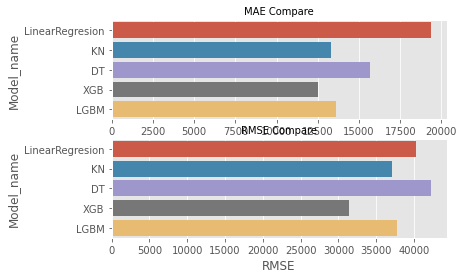

In [ ]:
pd_ln=evaluation_function(y_test['Generacion_Mwh'],y_pred_ln,['MAE','RMSE'],'LinearRegresion')
pd_kn=evaluation_function(y_test['Generacion_Mwh'],y_pred_KN,['MAE','RMSE'],'KN')
pd_DT=evaluation_function(y_test['Generacion_Mwh'],y_pred_DT,['MAE','RMSE'],'DT')
pd_XGB=evaluation_function(y_test['Generacion_Mwh'],y_pred_XGB,['MAE','RMSE'],'XGB')
pd_LGBM=evaluation_function(y_test['Generacion_Mwh'],y_pred_LGBM,['MAE','RMSE'],'LGBM')

pd_metrics=pd_ln.append(pd_kn)
pd_metrics=pd_metrics.append(pd_DT)
pd_metrics=pd_metrics.append(pd_XGB)
pd_metrics=pd_metrics.append(pd_LGBM)

plot_metrics(pd_metrics)

pd_metrics

## Overfitting

## The choosen one

Why?

In [ ]:
# export de pipeline of the model choosen

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

fechas-> preparar funcion o lambda
encoder -> ¿Como veo las columnas nuevas?
scaler -> pasar las columnas y un StandarScaler()
model

Para ejecutar.

Llamo a la funcion de train_test_split creada y ejecuto la pipeline?



from sklearn import set_config

set_config(display='diagram')
clf

# Interfaz y ploteado

> To other notebook




In [ ]:
# ver follium para pintar 5 puntos y dentro de cada uno, input de datos metereologicos.